<a href="https://colab.research.google.com/github/AbhishekAbsy0710/PDA_SetExersice/blob/main/PAMLP_Set_Exercise_G1%2CG2_Feb25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1


Shape of the dataset:
 (10, 2)

First 5 rows of the dataset:
    x   y
0  2  50
1  5  57
2  1  41
3  3  54
4  4  54


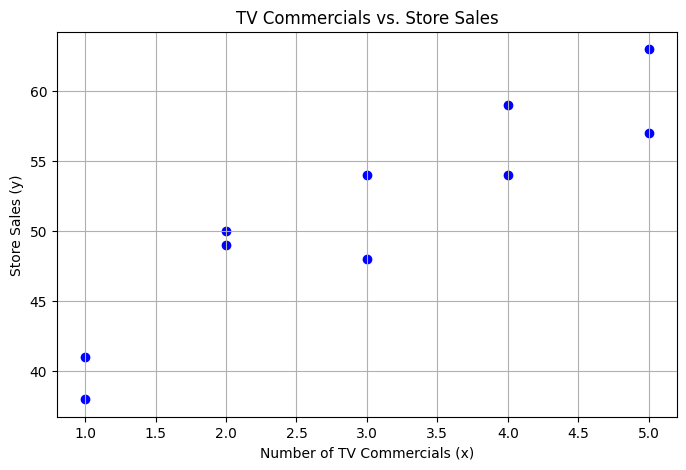

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np

# Create a DataFrame
df = pd.DataFrame({
    'x': [2, 5, 1, 3, 4, 1, 5, 3, 4, 2],
    'y': [50, 57, 41, 54, 54, 38, 63, 48, 59, 49]
})

print("Shape of the dataset:\n", df.shape)
print("\nFirst 5 rows of the dataset:\n", df.head())
# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['x'], df['y'], color='blue')
plt.title('TV Commercials vs. Store Sales')
plt.xlabel('Number of TV Commercials (x)')
plt.ylabel('Store Sales (y)')
plt.grid(True)
plt.show()


In [41]:
# Calculate correlation
correlation = df['x'].corr(df['y'])
print(f"Pearson correlation coefficient: {correlation:.2f}")


Pearson correlation coefficient: 0.92


In [42]:
# Prepare data
X = df[['x']]
Y = df['y']


# Fit linear regression
model = LinearRegression()
model.fit(X,Y)

pred = model.predict(X)
# Get model parameters
print("MAE:", mean_absolute_error(Y, pred))
print("MSE:", mean_squared_error(Y, pred))
print("R²:", r2_score(Y, pred))
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, Y)

print(f"\nRegression Equation: Sales = {slope:.2f} * Commercials + {intercept:.2f}\n")
print(f"R-squared value: {r_squared:.2f}")

MAE: 2.7399999999999993
MSE: 8.329999999999993
R²: 0.8469031428046316

Regression Equation: Sales = 4.80 * Commercials + 36.90

R-squared value: 0.85


In [44]:
# Calculate Reciduals
df['Predicted Sales'] = pred
df['Residuals'] = df['y'] - df['Predicted Sales']

print("Residuals:\n", df['Residuals'])

Residuals:
 0    3.5
1   -3.9
2   -0.7
3    2.7
4   -2.1
5   -3.7
6    2.1
7   -3.3
8    2.9
9    2.5
Name: Residuals, dtype: float64


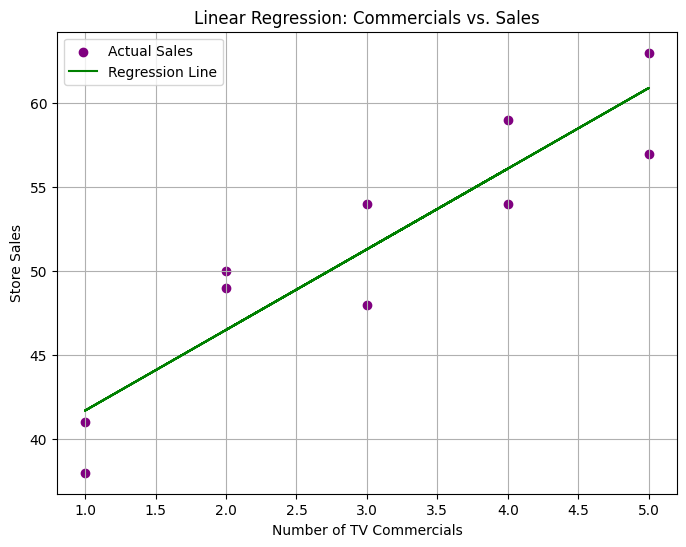

In [45]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], color='purple', label='Actual Sales')
plt.plot(df['x'], df['Predicted Sales'], color='green', label='Regression Line')
plt.xlabel('Number of TV Commercials')
plt.ylabel('Store Sales')
plt.title('Linear Regression: Commercials vs. Sales')
plt.legend()
plt.grid(True)
plt.show()

# TASK 2


Shape of the dataset:
 (18, 2)

First 5 rows of the dataset:
    Commercials  Sales
0            1    100
1            2     90
2            3     80
3            5     60
4            6     60


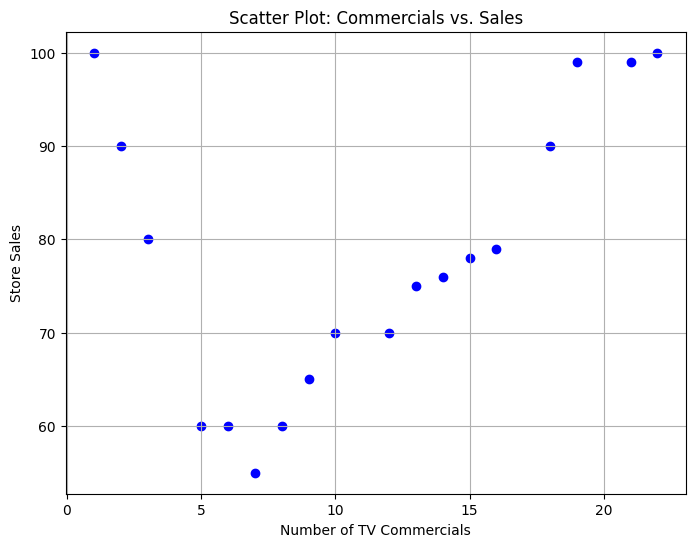

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Data
df_2 = pd.DataFrame({
    'Commercials': [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22],
    'Sales': [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
})
print("Shape of the dataset:\n", df_2.shape)
print("\nFirst 5 rows of the dataset:\n", df_2.head())

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_2['Commercials'], df_2['Sales'], color='blue')
plt.title('Scatter Plot: Commercials vs. Sales')
plt.xlabel('Number of TV Commercials')
plt.ylabel('Store Sales')
plt.grid(True)
plt.show()


Linear Regression R²: 0.182
Linear Regression MAE: 11.490
Linear Regression MSE: 179.608
Linear Regression Equation: Sales = 1.00 * Commercials + 66.97


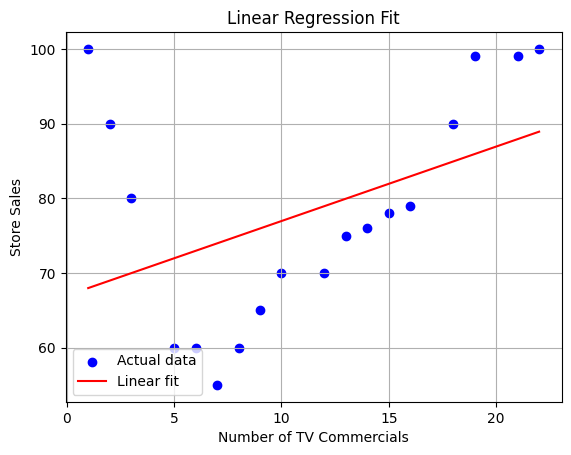

In [4]:
# Linear regression
X_linear = df_2[['Commercials']]
y_vals = df_2['Sales']

linear_model = LinearRegression()
linear_model.fit(X_linear, y_vals)
y_pred_linear = linear_model.predict(X_linear)

m_linear = linear_model.coef_[0]
b_linear = linear_model.intercept_
mae = mean_absolute_error(y_vals, y_pred_linear)
mse = mean_squared_error(y_vals, y_pred_linear)
r2_linear = r2_score(y_vals, y_pred_linear)
print(f"Linear Regression R²: {r2_linear:.3f}")
print(f"Linear Regression MAE: {mae:.3f}")
print(f"Linear Regression MSE: {mse:.3f}")
print(f"Linear Regression Equation: Sales = {m_linear:.2f} * Commercials + {b_linear:.2f}")


# Plot linear regression line
plt.scatter(df_2['Commercials'], df_2['Sales'], color='blue', label='Actual data')
plt.plot(df_2['Commercials'], y_pred_linear, color='red', label='Linear fit')
plt.title('Linear Regression Fit')
plt.xlabel('Number of TV Commercials')
plt.ylabel('Store Sales')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
corr = df_2['Commercials'].corr(df_2['Sales'])
print(f"Pearson correlation coefficient: {corr:.2f}")

Pearson correlation coefficient: 0.43


In [6]:
# Prepare variables
X = df_2['Commercials']
y = df_2['Sales']

# Create quadratic features: x and x²
X_q = pd.DataFrame({'x': X, 'x_squared': X**2})

# Fit quadratic regression model
model = LinearRegression()
model.fit(X_q, y)

# Get coefficients
a = model.coef_[1]  # coefficient for x²
b = model.coef_[0]  # coefficient for x
c = model.intercept_


print(f"Quadratic Regression R²: {r2_score(y, model.predict(X_q)):.3f}")
print(f"Quadratic Regression MSE: {mean_squared_error(y, model.predict(X_q)):.3f}")
print(f"Quadratic Regression MAE: {mean_absolute_error(y, model.predict(X_q)):.3f}")
print(f"Quadratic regression equation: Sales = {a:.2f}*x² + {b:.2f}*x + {c:.2f}")


Quadratic Regression R²: 0.760
Quadratic Regression MSE: 52.766
Quadratic Regression MAE: 6.264
Quadratic regression equation: Sales = 0.30*x² + -5.86*x + 94.02



Polynomial Regression (Degree 2) R²: 0.760
Polynomial Regression (Degree 2) MAE: 6.264
Polynomial Regression (Degree 2) MSE: 52.766


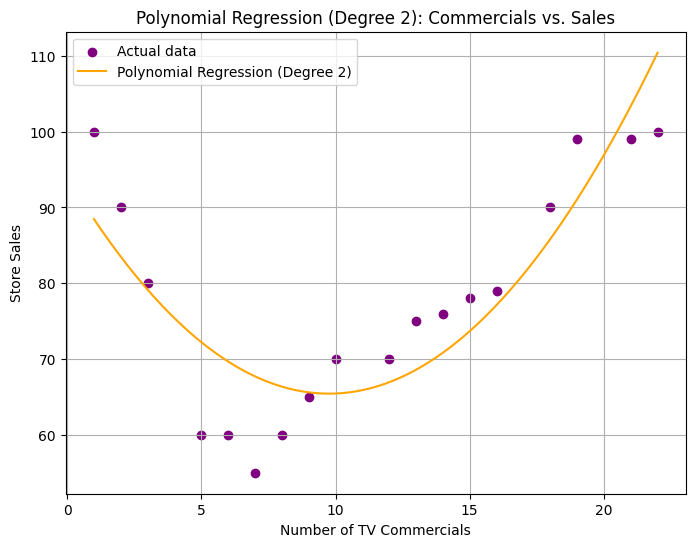

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Prepare variables
X = df_2[['Commercials']]
y = df_2['Sales']

degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fit linear regression model to the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Make predictions
y_pred_poly = poly_model.predict(X_poly)

# Evaluate the polynomial model
r2_poly = r2_score(y, y_pred_poly)
mae_poly = mean_absolute_error(y, y_pred_poly)
mse_poly = mean_squared_error(y, y_pred_poly)

print(f"\nPolynomial Regression (Degree {degree}) R²: {r2_poly:.3f}")
print(f"Polynomial Regression (Degree {degree}) MAE: {mae_poly:.3f}")
print(f"Polynomial Regression (Degree {degree}) MSE: {mse_poly:.3f}")

# Plot actual data and polynomial regression curve
x_vals = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
x_vals_poly = poly_features.transform(x_vals)
y_preds_poly = poly_model.predict(x_vals_poly)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='purple', label='Actual data')
plt.plot(x_vals, y_preds_poly, color='orange', label=f'Polynomial Regression (Degree {degree})')
plt.title(f'Polynomial Regression (Degree {degree}): Commercials vs. Sales')
plt.xlabel('Number of TV Commercials')
plt.ylabel('Store Sales')
plt.legend()
plt.grid(True)
plt.show()


Polynomial Regression (Degree 3) R²: 0.943
Polynomial Regression (Degree 3) MAE: 2.776
Polynomial Regression (Degree 3) MSE: 12.473


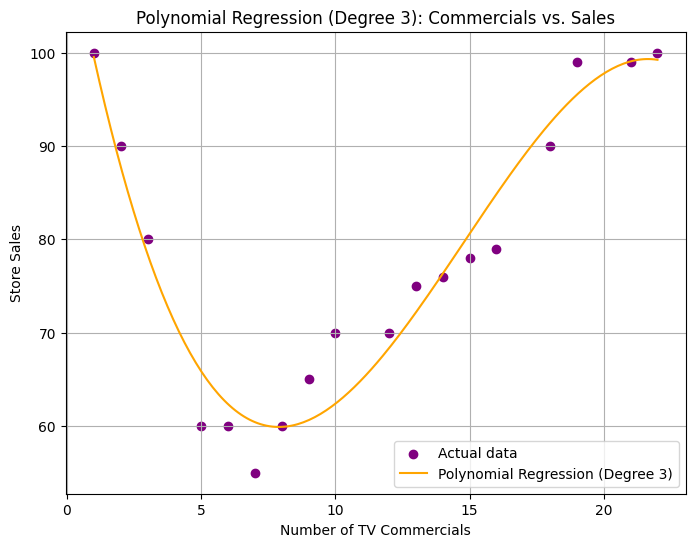

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Prepare variables
X = df_2[['Commercials']]
y = df_2['Sales']

degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fit linear regression model to the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Make predictions
y_pred_poly = poly_model.predict(X_poly)

# Evaluate the polynomial model
r2_poly = r2_score(y, y_pred_poly)
mae_poly = mean_absolute_error(y, y_pred_poly)
mse_poly = mean_squared_error(y, y_pred_poly)

print(f"\nPolynomial Regression (Degree {degree}) R²: {r2_poly:.3f}")
print(f"Polynomial Regression (Degree {degree}) MAE: {mae_poly:.3f}")
print(f"Polynomial Regression (Degree {degree}) MSE: {mse_poly:.3f}")

# Plot actual data and polynomial regression curve
x_vals = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
x_vals_poly = poly_features.transform(x_vals)
y_preds_poly = poly_model.predict(x_vals_poly)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='purple', label='Actual data')
plt.plot(x_vals, y_preds_poly, color='orange', label=f'Polynomial Regression (Degree {degree})')
plt.title(f'Polynomial Regression (Degree {degree}): Commercials vs. Sales')
plt.xlabel('Number of TV Commercials')
plt.ylabel('Store Sales')
plt.legend()
plt.grid(True)
plt.show()

# TASK 3

In [19]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_score, recall_score, f1_score, auc
import seaborn as sns

# Load the Banknote Authentication Dataset
columns = ["variance", "skewness", "curtosis", "entropy", "class"]
df = pd.read_csv("/content/data_banknote_authentication.txt", header=None, names=columns)

print("Shape of the dataset:\n")
display(df.shape)
print("\nFirst 5 rows of the dataset:\n")
display(df.head())
print("\nSummary statistics:\n")
display(df.describe())

Shape of the dataset:



(1372, 5)


First 5 rows of the dataset:



,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0



Summary statistics:



,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [21]:
# Calculate IQR, Lower Bound, and Upper Bound for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers in each column
outliers = {}
for col in df.columns:
    outliers[col] = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])]

# Print the number of outliers found in each column
print("\nNumber of outliers in each feature:")
for col, outlier_df in outliers.items():
    print(f"{col}: {len(outlier_df)}")



Number of outliers in each feature:
variance: 0
skewness: 0
curtosis: 59
entropy: 33
class: 0


In [27]:
# Remove outliers

for col in df.columns:
    df = df[(df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col])]

print("\nShape of the dataset after removing outliers:\n", df.shape)

# Check for outliers in the cleaned dataset
outliers_cleaned = {}
for col in df.columns:
    outliers_cleaned[col] = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])]

# Print the number of outliers found in the cleaned dataset
print("\nNumber of outliers in each feature in the cleaned dataset:")
for col, outlier_df in outliers_cleaned.items():
    print(f"{col}: {len(outlier_df)}")


Shape of the dataset after removing outliers:
 (1280, 5)

Number of outliers in each feature in the cleaned dataset:
variance: 0
skewness: 0
curtosis: 0
entropy: 0
class: 0


Accuracy: 0.859375
Precision: 0.8076923076923077
Recall: 0.84
F1 Score: 0.8235294117647058

 Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       234
           1       0.81      0.84      0.82       150

    accuracy                           0.86       384
   macro avg       0.85      0.86      0.85       384
weighted avg       0.86      0.86      0.86       384



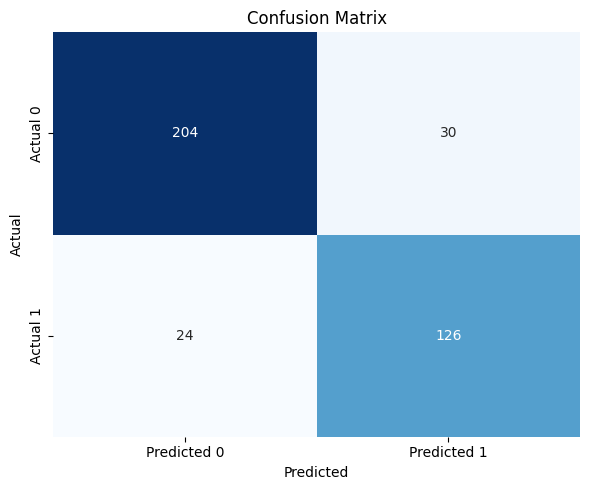

In [28]:
# Select 3 features for visualization and classification
X = df[["variance", "skewness", "entropy"]]
y = df["class"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Support Vector Machine (SVM) classifier
model = svm.SVC(kernel='linear', C=1, gamma='scale')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\n Classification Report:\n")
print(class_report)

plt.figure(figsize=(6, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=['Predicted 0', 'Predicted 1'],yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()



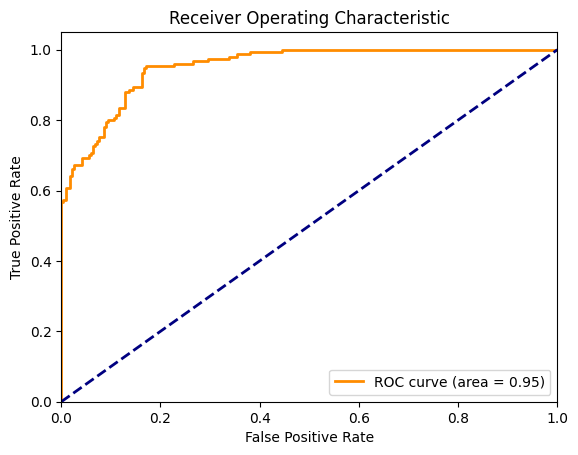

In [29]:
# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_recall = recall_score(y_test, y_pred_tuned)
tuned_precision = precision_score(y_test, y_pred_tuned)
tuned_f1 = f1_score(y_test, y_pred_tuned)

tab_df = pd.DataFrame()
tab_df['Metrics'] = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
tab_df['Values'] = [tuned_accuracy, tuned_recall, tuned_precision, tuned_f1]
print("\nTest set accuracy with best parameters: ", tuned_accuracy)
print("\nTest set recall with best parameters: ", tuned_recall)
print("\nTest set precision with best parameters: ", tuned_precision)
print("\nTest set F1 score with best parameters: ", tuned_f1)

tab_df

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10

,Metrics,Values
0,Accuracy,0.968750
1,Recall,0.986667
2,Precision,0.936709
3,F1 Score,0.961039


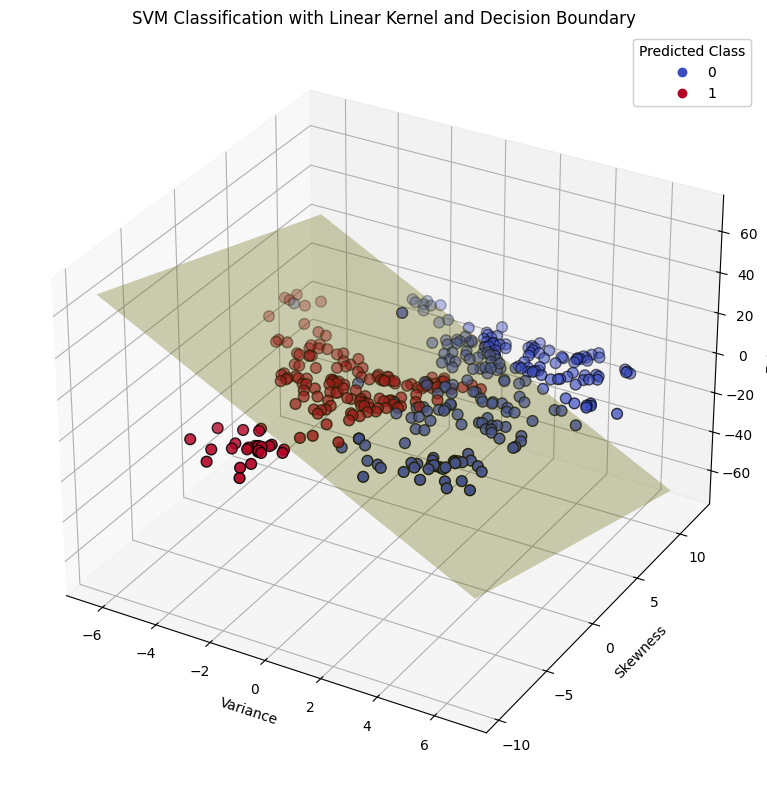

In [37]:
# Prepare for 3D visualization
# Extract coefficients and intercept for the linear decision function
coef = model.coef_[0]
intercept = model.intercept_[0]

# Create grid to plot the plane
xx, yy = np.meshgrid(
    np.linspace(X_test['variance'].min(), X_test['variance'].max(), 30),
    np.linspace(X_test['skewness'].min(), X_test['skewness'].max(), 30)
)

zz = -(coef[0]*xx + coef[1]*yy + intercept) / coef[2]

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the test points colored by predicted class
scatter = ax.scatter(X_test["variance"], X_test["skewness"], X_test["entropy"], c=y_pred_tuned, cmap='coolwarm', edgecolor='k', s=60)

# Plot the decision boundary plane
ax.plot_surface(xx, yy, zz, color='yellow', alpha=0.3)

ax.set_xlabel("Variance")
ax.set_ylabel("Skewness")
ax.set_zlabel("Entropy")
ax.set_title("SVM Classification with Linear Kernel and Decision Boundary")

leg = ax.legend(*scatter.legend_elements(), title="Predicted Class")
ax.add_artist(leg)
plt.tight_layout()
plt.show()
